# **Machine Learning Week 4**
---
> Introduction to Machine Learning <br>
> Sekolah Data, Pacmann

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load Data
data = pd.read_csv("dataset/w4-2-mtcars.csv")

data.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [3]:
# Drop model mobil
data = data.drop(columns = ["model"])

data.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


Kita akan memprediksi mpg (miles/gallon) -- ukuran konsumsi bahan bakar

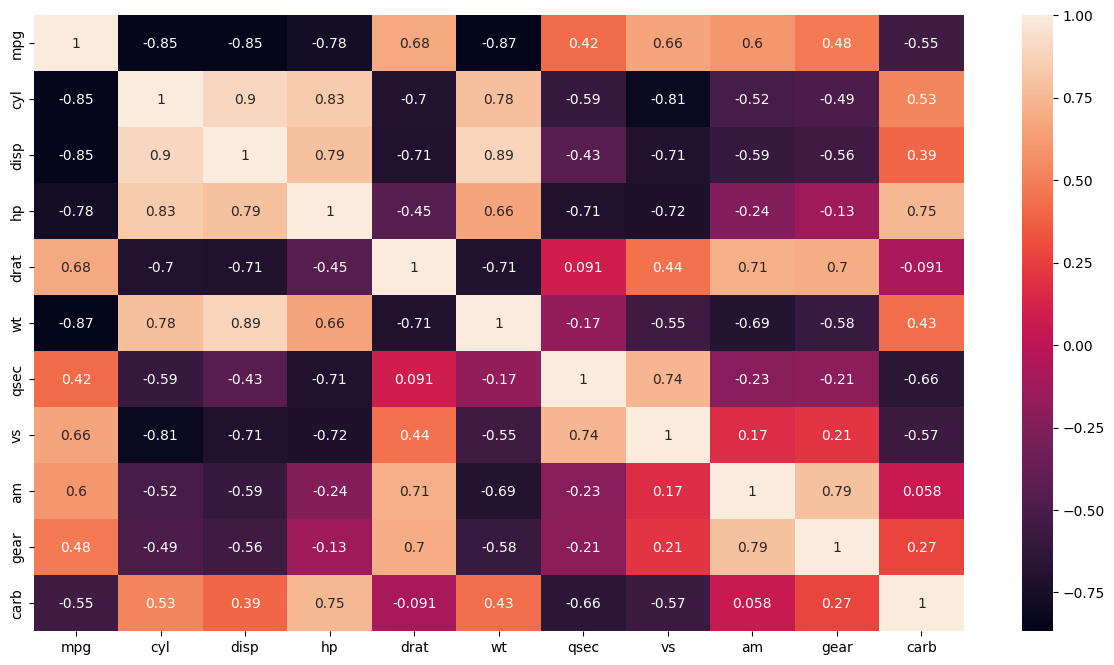

In [4]:
# Eksplorasi
plt.figure(figsize = (15, 8))
sns.heatmap(data.corr(),
            annot = True)

plt.show()

---
# **Prepare Data**

**Split input-output**

In [5]:
# Buat input & output
def split_input_output(data, target_column):
    X = data.drop(columns = target_column)
    y = data[target_column]

    return X, y

X, y = split_input_output(data = data,
                          target_column = "mpg")

In [6]:
X.head()

,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [7]:
y.head()

0    21.0
1    21.0
2    22.8
3    21.4
4    18.7
Name: mpg, dtype: float64

**Split train & test**

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 123)

In [10]:
X_train.head()

,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
21,8,318.0,150,2.76,3.520,16.87,0,0,3,2
11,8,275.8,180,3.07,4.070,17.40,0,0,3,3
23,8,350.0,245,3.73,3.840,15.41,0,0,3,4
18,4,75.7,52,4.93,1.615,18.52,1,1,4,2
4,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [11]:
y_train.head()

21    15.5
11    16.4
23    13.3
18    30.4
4     18.7
Name: mpg, dtype: float64

---
# **Melakukan Linear Regression**

**Tentukan baseline model**

- Baseline model regresi adalah rata-rata dari target

In [12]:
baseline_pred = np.mean(y_train)
print(baseline_pred)

19.3


- Atau dapat gunakan `sklearn.DummyRegressor` untuk model regresi

In [13]:
from sklearn.dummy import DummyRegressor

# Create object
baseline_model = DummyRegressor(strategy='mean')

# Fit object
baseline_model.fit(X_train, y_train)

DummyRegressor()

- Lakukan prediksi data train menggunakan baseline model

In [14]:
y_train_pred = baseline_model.predict(X_train)
y_train_pred

array([19.3, 19.3, 19.3, 19.3, 19.3, 19.3, 19.3, 19.3, 19.3, 19.3, 19.3,
       19.3, 19.3, 19.3, 19.3, 19.3, 19.3, 19.3, 19.3, 19.3, 19.3, 19.3,
       19.3, 19.3, 19.3])

- Sekarang, lakukan pencarian performa model pada data train

In [15]:
from sklearn.metrics import mean_squared_error

mse_baseline_train = mean_squared_error(y_true = y_train,
                                        y_pred = y_train_pred)
print(mse_baseline_train)

37.193599999999996


Lakukan cross-validation pada dummy regressor ini

In [16]:
# Lakukan cross validation
from sklearn.model_selection import cross_val_score

scores_baseline = cross_val_score(estimator = baseline_model,
                                  X = X_train,
                                  y = y_train,
                                  cv = 5,
                                  scoring = 'neg_mean_squared_error')

mse_baseline_cv = -np.mean(scores_baseline)
mse_baseline_cv

np.float64(39.23434999999999)

In [88]:
scores_baseline

array([-36.5929  , -23.872025, -29.9296  , -92.345225, -13.432   ])

**Buat Objek Linear Regression**

In [17]:
from sklearn.linear_model import LinearRegression

- Fitting model

In [18]:
# Buat objek
lr = LinearRegression()

In [19]:
# Lakukan fitting
lr.fit(X_train, y_train)

LinearRegression()

- Evaluasi model

In [20]:
# Predict y_train
y_train_pred = lr.predict(X_train)

# Cari MSE di data train
mse_lr_train = mean_squared_error(y_true = y_train,
                                  y_pred = y_train_pred)
print(mse_lr_train)

3.885550657391801


In [21]:
# Lakukan cross validation
scores_lr = cross_val_score(estimator = lr,
                            X = X_train,
                            y = y_train,
                            cv = 5,
                            scoring = "neg_mean_squared_error")

mse_lr_cv = -np.mean(scores_lr)
mse_lr_cv

np.float64(23.421110339589298)

**Tentukan model terbaik**

- Bandingkan performa di data validasi

In [22]:
model_summary = pd.DataFrame({"Model Name": ['Baseline', 'LinearRegression'],
                              "Model": [baseline_model, lr],
                              "MSE Train": [mse_baseline_train, mse_lr_train],
                              "MSE CV": [mse_baseline_cv, mse_lr_cv]})

model_summary

,Model Name,Model,MSE Train,MSE CV
0,Baseline,DummyRegressor(),37.193600,39.23435
1,LinearRegression,LinearRegression(),3.885551,23.42111


- Model terbaik adalah model yang performa di data validasinya paling baik.
- Dalam kasus ini, model terbaik adalah model Linear Regression

**Test Performa model terbaik di data Test**

In [23]:
# Cek test scores
y_pred_test = lr.predict(X_test)

# Cari MSE data test
test_score = mean_squared_error(y_true = y_test,
                                y_pred = y_pred_test)
test_score

np.float64(16.511353509876276)

- Apa pandangan kalian tentang hasil performa di data test?
- Selanjutnya ekstrak parameter model

In [90]:
# Ekstrak model parameter
coef_ = lr.coef_
intercept_ = lr.intercept_
lr_params = np.append(coef_, intercept_)

lr_params = pd.DataFrame(lr_params,
                         index = list(X_train.columns) + ["constant"],
                         columns = ["coefficient"]).sort_values(by = 'coefficient', ascending=False)
lr_params

,coefficient
am,5.880618
qsec,2.139810
drat,1.820345
cyl,1.097167
vs,0.851392
carb,0.032545
disp,0.006168
hp,-0.005287
gear,-1.092819
wt,-3.668249


**Buat semuanya jadi 1 fungsi**

In [93]:
def fit_model(estimator, X_train, y_train):
    """Fungsi untuk fitting model"""
    # 1. Fitting model
    estimator.fit(X_train, y_train)

    # 2. Cari evaluasi di data train & valid
    y_pred_train = estimator.predict(X_train)
    train_score = mean_squared_error(y_true = y_train,
                                     y_pred = y_pred_train)

    valid_scores = cross_val_score(estimator = estimator,
                                   X = X_train,
                                   y = y_train,
                                   cv = 5,
                                   scoring = 'neg_mean_squared_error')
    cv_score = -np.mean(valid_scores)

    # 3. Ekstrak coefficient
    coef_ = estimator.coef_
    intercept_ = estimator.intercept_
    estimator_params = np.append(coef_, intercept_)

    estimator_params_df = pd.DataFrame(estimator_params,
                                       index = list(X_train.columns) + ["constant"],
                                       columns = ["coefficient"]).sort_values(by = 'coefficient', ascending=False)

    return estimator, train_score, cv_score, estimator_params_df


In [94]:
lr, train_score, cv_score, lr_params_df = fit_model(estimator = LinearRegression(),
                                                    X_train = X_train,
                                                    y_train = y_train)

print(f"train score: {train_score:.3f}, cv score: {cv_score:.3f}")

train score: 3.886, cv score: 23.421


In [95]:
lr_params_df

,coefficient
am,5.880618
qsec,2.139810
drat,1.820345
cyl,1.097167
vs,0.851392
carb,0.032545
disp,0.006168
hp,-0.005287
gear,-1.092819
wt,-3.668249


---
# **Melakukan Best Selection**
Buat kombinasi semua yang mungkin

In [27]:
from itertools import combinations

In [28]:
column_list = list(X_train.columns)
n_column = len(column_list)

column_list

['cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']

In [29]:
train_column_list = []

for i in range(n_column):
    list_of_combination = combinations(column_list, i)
    for combi in list_of_combination:
        train_column_list.append(list(combi))

# tambahkan seluruh kolom
train_column_list.append(column_list)

In [30]:
len(train_column_list)

1024

In [96]:
train_column_list

[[],
 ['cyl'],
 ['disp'],
 ['hp'],
 ['drat'],
 ['wt'],
 ['qsec'],
 ['vs'],
 ['am'],
 ['gear'],
 ['carb'],
 ['cyl', 'disp'],
 ['cyl', 'hp'],
 ['cyl', 'drat'],
 ['cyl', 'wt'],
 ['cyl', 'qsec'],
 ['cyl', 'vs'],
 ['cyl', 'am'],
 ['cyl', 'gear'],
 ['cyl', 'carb'],
 ['disp', 'hp'],
 ['disp', 'drat'],
 ['disp', 'wt'],
 ['disp', 'qsec'],
 ['disp', 'vs'],
 ['disp', 'am'],
 ['disp', 'gear'],
 ['disp', 'carb'],
 ['hp', 'drat'],
 ['hp', 'wt'],
 ['hp', 'qsec'],
 ['hp', 'vs'],
 ['hp', 'am'],
 ['hp', 'gear'],
 ['hp', 'carb'],
 ['drat', 'wt'],
 ['drat', 'qsec'],
 ['drat', 'vs'],
 ['drat', 'am'],
 ['drat', 'gear'],
 ['drat', 'carb'],
 ['wt', 'qsec'],
 ['wt', 'vs'],
 ['wt', 'am'],
 ['wt', 'gear'],
 ['wt', 'carb'],
 ['qsec', 'vs'],
 ['qsec', 'am'],
 ['qsec', 'gear'],
 ['qsec', 'carb'],
 ['vs', 'am'],
 ['vs', 'gear'],
 ['vs', 'carb'],
 ['am', 'gear'],
 ['am', 'carb'],
 ['gear', 'carb'],
 ['cyl', 'disp', 'hp'],
 ['cyl', 'disp', 'drat'],
 ['cyl', 'disp', 'wt'],
 ['cyl', 'disp', 'qsec'],
 ['cyl', 'disp', 'vs

Coba kita ambil salah satu kombinasi model

In [ ]:
idx = 95 # acak
train_list_idx = train_column_list[idx]
train_list_idx

['disp', 'hp', 'vs']

In [32]:
# Filter Data
X_train_idx = X_train[train_list_idx]
X_train_idx.head()

,disp,hp,vs
21,318.0,150,0
11,275.8,180,0
23,350.0,245,0
18,75.7,52,1
4,360.0,175,0


In [33]:
# Lakukan modeling
_, train_idx, cv_idx, _ = fit_model(estimator = LinearRegression(),
                                    X_train = X_train_idx,
                                    y_train = y_train)

print(f"train score: {train_idx:.3f}, cv score: {cv_idx:.3f}")

train score: 8.990, cv score: 13.996


Ambil kombinasi lain

In [ ]:
idx = 520 # acak
train_list_idx = train_column_list[idx]
train_list_idx

['disp', 'hp', 'drat', 'qsec', 'carb']

In [35]:
# Filter Data
X_train_idx = X_train[train_list_idx]
X_train_idx.head()

,disp,hp,drat,qsec,carb
21,318.0,150,2.76,16.87,2
11,275.8,180,3.07,17.40,3
23,350.0,245,3.73,15.41,4
18,75.7,52,4.93,18.52,2
4,360.0,175,3.15,17.02,2


In [36]:
# Lakukan modeling
_, train_idx, cv_idx, _ = fit_model(estimator = LinearRegression(),
                                    X_train = X_train_idx,
                                    y_train = y_train)

print(f"train score: {train_idx:.3f}, cv score: {cv_idx:.3f}")

train score: 6.454, cv score: 18.045


Cari semua train & validation scores

In [37]:
train_score = []
cv_score = []

for idx in range(len(train_column_list)):
    if idx != 0:
        # Filter data
        train_list_idx = train_column_list[idx]
        X_train_idx = X_train[train_list_idx]

        # Buat model
        _, train_idx, cv_idx, _ = fit_model(estimator = LinearRegression(),
                                            X_train = X_train_idx,
                                            y_train = y_train)

        # Simpan hasil
        train_score.append(train_idx)
        cv_score.append(cv_idx)

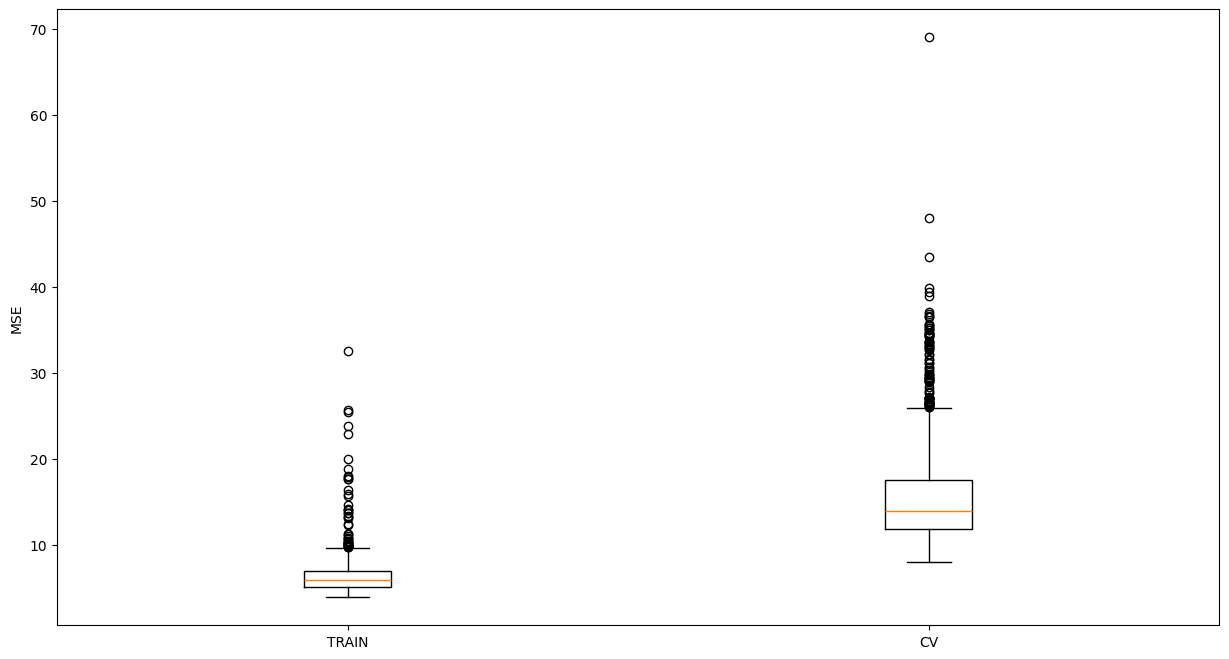

In [38]:
# Plot hasil
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 8))

ax.boxplot([train_score, cv_score])

ax.set_xticklabels(["TRAIN", "CV"])
ax.set_ylabel("MSE")
plt.show()

In [39]:
# Cari best di data validasi
best_score = np.min(cv_score)
best_idx = np.argmin(cv_score)

best_idx, best_score

(np.int64(477), np.float64(7.98957725252294))

In [40]:
# Best features
train_column_list[best_idx + 1]

['cyl', 'drat', 'wt', 'qsec', 'am']

In [41]:
# Find model
lr_best, train_best_score, \
        cv_best_score, lr_params_best = fit_model(estimator = LinearRegression(),
                                                  X_train = X_train[train_column_list[best_idx+1]],
                                                  y_train = y_train)

print('Train score :', train_best_score)
print('CV score    :', cv_best_score)

Train score : 4.113333306973902
CV score    : 7.98957725252294


In [42]:
lr_params_best

,coefficient
cyl,1.282553
drat,1.639653
wt,-3.579665
qsec,2.539308
am,4.763395
constant,-29.508518


---
# **Melakukan Regularisasi Ridge**

In [102]:
# Import Ridge
from sklearn.linear_model import Ridge

In [103]:
# Buat objek
ridge = Ridge(alpha = 1.0) # Lambda

In [104]:
# Lakukan fitting
ridge.fit(X = X_train,
          y = y_train)

Ridge()

In [105]:
# Buat prediksi di data train
y_pred_train = ridge.predict(X_train)
train_score = mean_squared_error(y_train, y_pred_train)
train_score

np.float64(4.351995705520227)

In [106]:
# Lakukan cross validation
scores = cross_val_score(estimator = ridge,
                         X = X_train,
                         y = y_train,
                         cv = 5,
                         scoring = "neg_mean_squared_error")

scores

array([ -2.19724228, -13.7246591 ,  -2.94363723, -21.7404056 ,
       -19.51216624])

In [108]:
cv_score = -np.mean(scores)
cv_score

np.float64(12.023622089361949)

In [109]:
# Tampilkan parameter
coef_ = ridge.coef_
intercept_ = ridge.intercept_
params = np.append(coef_, intercept_)

params_df = pd.DataFrame(params,
                         index = list(X_train.columns) + ["constant"],
                         columns = ["coefficient"]).sort_values(by = 'coefficient', ascending=False)
params_df

,coefficient
am,2.575431
constant,2.057600
drat,1.381862
qsec,1.163854
gear,0.545309
disp,-0.000219
hp,-0.005684
cyl,-0.118668
vs,-0.327942
carb,-0.583326


In [110]:
alpha = 1.0
_, train_score, cv_score, ridge_param = fit_model(estimator = Ridge(alpha=alpha),
                                                  X_train = X_train,
                                                  y_train = y_train)

print(f"train score: {train_score:.3f}, cv score: {cv_score:.3f}")
ridge_param

train score: 4.352, cv score: 12.024


,coefficient
am,2.575431
constant,2.057600
drat,1.381862
qsec,1.163854
gear,0.545309
disp,-0.000219
hp,-0.005684
cyl,-0.118668
vs,-0.327942
carb,-0.583326


In [111]:
alpha = 10.5
_, train_score, cv_score, ridge_param = fit_model(estimator = Ridge(alpha=alpha),
                                                  X_train = X_train,
                                                  y_train = y_train)

print(f"train score: {train_score:.3f}, cv score: {cv_score:.3f}")
ridge_param

train score: 5.949, cv score: 11.961


,coefficient
constant,26.755055
am,0.745650
drat,0.519241
gear,0.447634
qsec,0.136589
vs,0.053231
hp,-0.011695
disp,-0.015011
cyl,-0.538565
carb,-0.680773


In [112]:
alphas = [0.5, 1.0, 2.5, 5.0, 7.5, 10.0,
          12.5, 15.0, 17.5, 30.0, 50.0] # iterasi dengan banyak alpha untuk mencari yang mana yang menghasilkan cv paling rendah

mse_train_list = []
mse_cv_list = []
model_list = []

for alpha in alphas:
    model_i, train_score_i, \
        cv_score_i, model_param_i = fit_model(estimator = Ridge(alpha=alpha),
                                              X_train = X_train,
                                              y_train = y_train)

    mse_train_list.append(train_score_i)
    mse_cv_list.append(cv_score_i)
    model_list.append(model_param_i)

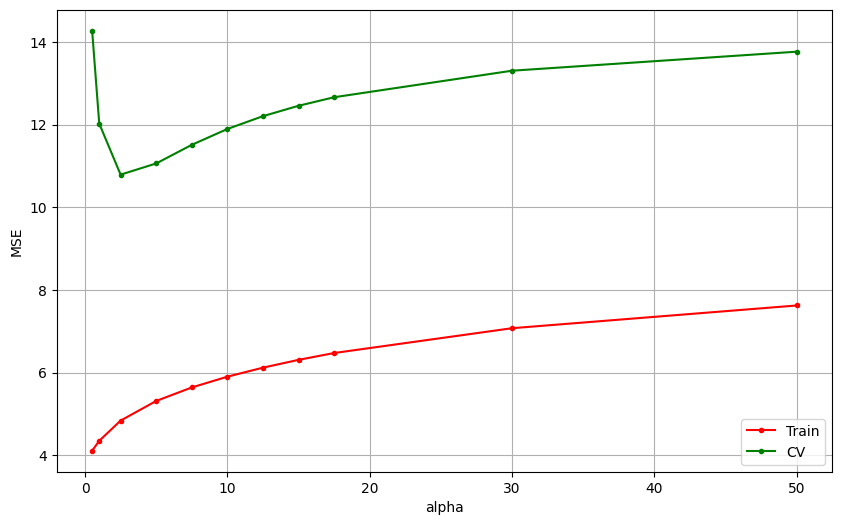

In [113]:
# Plot error
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

ax.plot(alphas, mse_train_list, c="r", marker=".", label="Train")
ax.plot(alphas, mse_cv_list, c="g", marker=".", label="CV")

ax.set_xlabel("alpha")
ax.set_ylabel("MSE")

plt.grid()
plt.legend()
plt.show()

In [114]:
# Best parameter adalah saat MSE di CV paling kecil
best_idx = np.argmin(mse_cv_list)
best_alpha = alphas[best_idx]
best_ridge_cv = mse_cv_list[best_idx]

best_alpha, best_ridge_cv

(2.5, np.float64(10.789408042167231))

In [115]:
# Best model
best_param_ridge = model_list[best_idx]
best_param_ridge

,coefficient
constant,14.389671
am,1.701397
drat,1.025724
gear,0.680265
qsec,0.624478
disp,-0.005147
hp,-0.007531
vs,-0.126656
cyl,-0.453721
carb,-0.731590


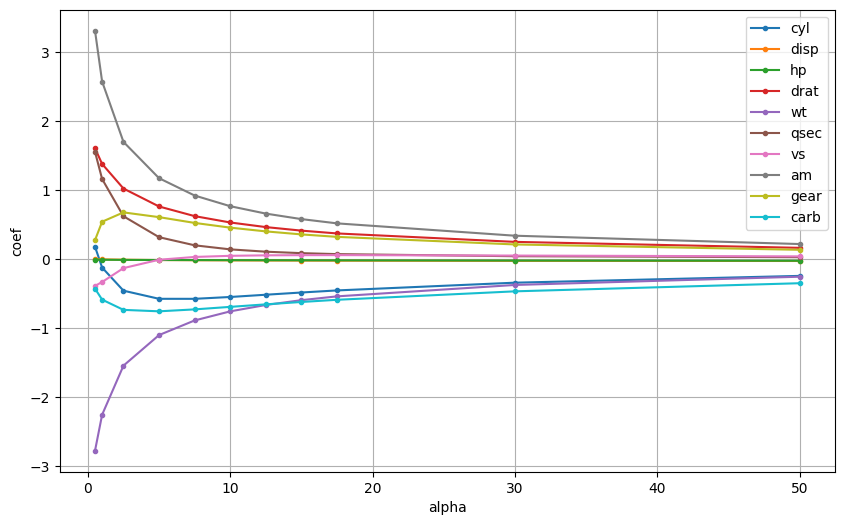

In [116]:
# Buat summary plot
models = pd.concat(model_list, axis=1)
models.columns = alphas

# Plot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

for col in X_train.columns:
    ax.plot(alphas, models.loc[col], label=col, marker=".")

ax.set_xlabel("alpha")
ax.set_ylabel("coef")
plt.legend()
plt.grid()
plt.show()

Ada cara lebih cepat

In [117]:
# Import grid search
from sklearn.model_selection import GridSearchCV

In [118]:
# Buat model & parameter model yang ingin divariasikan
ridge = Ridge()

param_space = {"alpha": alphas}
param_space

{'alpha': [0.5, 1.0, 2.5, 5.0, 7.5, 10.0, 12.5, 15.0, 17.5, 30.0, 50.0]}

In [119]:
# Lakukan grid search dengan CV
cv_ridge = GridSearchCV(estimator = ridge,
                        param_grid = param_space,
                        scoring = "neg_mean_squared_error",
                        cv = 5)

# Fit searching
cv_ridge.fit(X = X_train,
             y = y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.5, 1.0, 2.5, 5.0, 7.5, 10.0, 12.5, 15.0,
                                   17.5, 30.0, 50.0]},
             scoring='neg_mean_squared_error')

In [120]:
cv_ridge.best_params_

{'alpha': 2.5}

In [121]:
# Buat objek baru
best_ridge = Ridge(alpha = cv_ridge.best_params_["alpha"])

# Fit model
best_ridge.fit(X = X_train,
               y = y_train)

Ridge(alpha=2.5)

In [122]:
best_ridge.coef_

array([-0.45372081, -0.00514687, -0.00753064,  1.02572436, -1.53952835,
        0.62447844, -0.12665636,  1.70139692,  0.68026538, -0.73159023])

---
# **Melakukan Regularisasi Lasso**

In [123]:
# Import Ridge
from sklearn.linear_model import Lasso

In [124]:
# Buat objek
lasso = Lasso(alpha = 0.1)

In [125]:
# Lakukan fitting
lasso.fit(X = X_train,
          y = y_train)

Lasso(alpha=0.1)

In [126]:
# Buat prediksi di data train
y_pred_train = lasso.predict(X_train)
train_score = mean_squared_error(y_train, y_pred_train)
train_score

np.float64(4.327370493605129)

In [67]:
# Lakukan cross validation
scores = cross_val_score(estimator = lasso,
                         X = X_train,
                         y = y_train,
                         cv = 5,
                         scoring = "neg_mean_squared_error")

scores

array([ -2.48557133, -14.38439648,  -4.24155457, -25.37018085,
       -22.5366672 ])

In [68]:
cv_score = -np.mean(scores)
cv_score

np.float64(13.803674084603486)

In [127]:
# Tampilkan parameter
coef_ = lasso.coef_
intercept_ = lasso.intercept_
params = np.append(coef_, intercept_)

params_df = pd.DataFrame(params,
                         index = list(X_train.columns) + ["constant"],
                         columns = ["coefficient"]).sort_values(by = 'coefficient', ascending=False)
params_df

,coefficient
constant,5.622423
am,3.265893
qsec,1.126072
drat,0.921383
gear,0.000000
cyl,-0.000000
vs,0.000000
disp,-0.000769
hp,-0.008676
carb,-0.384994


In [128]:
alpha = 0.1
_, train_score, cv_score, lasso_param = fit_model(estimator = Lasso(alpha=alpha),
                                                  X_train = X_train,
                                                  y_train = y_train)

print(f"train score: {train_score:.3f}, cv score: {cv_score:.3f}")
lasso_param

train score: 4.327, cv score: 13.804


,coefficient
constant,5.622423
am,3.265893
qsec,1.126072
drat,0.921383
gear,0.000000
cyl,-0.000000
vs,0.000000
disp,-0.000769
hp,-0.008676
carb,-0.384994


In [129]:
alpha = 0.01
_, train_score, cv_score, lasso_param = fit_model(estimator = Lasso(alpha=alpha),
                                                  X_train = X_train,
                                                  y_train = y_train)

print(f"train score: {train_score:.3f}, cv score: {cv_score:.3f}")
lasso_param

train score: 3.910, cv score: 21.947


,coefficient
am,4.880959
qsec,2.092492
drat,1.752196
cyl,0.725381
disp,0.006544
vs,0.000000
hp,-0.004540
carb,-0.092963
gear,-0.456863
wt,-3.565695


In [130]:
alphas = [0.05, 0.10, 0.15, 0.20, 0.25, 1.00,
          1.25, 1.50, 1.75, 3.00, 5.00]

mse_train_list = []
mse_cv_list = []
model_list = []

for alpha in alphas:
    model_i, train_score_i, \
        cv_score_i, model_param_i = fit_model(estimator = Lasso(alpha=alpha),
                                              X_train = X_train,
                                              y_train = y_train)

    mse_train_list.append(train_score_i)
    mse_cv_list.append(cv_score_i)
    model_list.append(model_param_i)


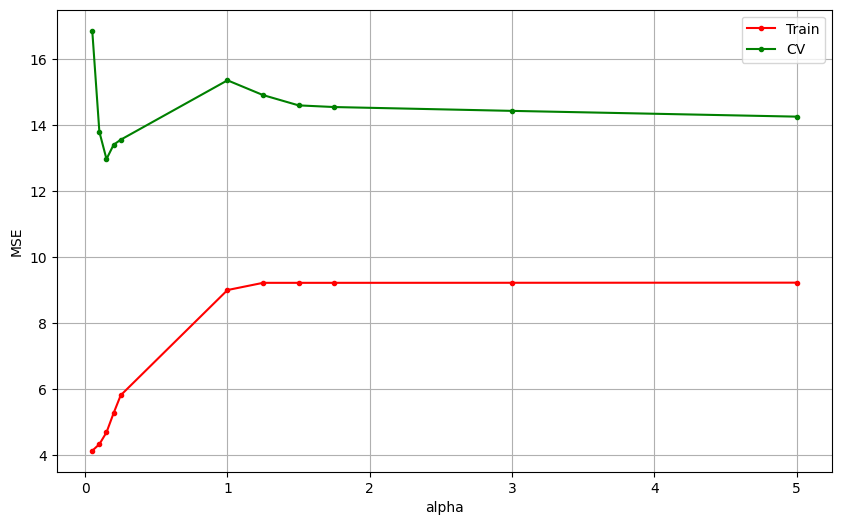

In [131]:
# Plot error
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

ax.plot(alphas, mse_train_list, c="r", marker=".", label="Train")
ax.plot(alphas, mse_cv_list, c="g", marker=".", label="CV")

ax.set_xlabel("alpha")
ax.set_ylabel("MSE")

plt.grid()
plt.legend()
plt.show()

In [132]:
# Best parameter adalah saat MSE di CV paling kecil
best_idx = np.argmin(mse_cv_list)
best_alpha = alphas[best_idx]
best_lasso_cv = mse_cv_list[best_idx]
best_alpha, best_lasso_cv, best_idx

(0.15, np.float64(12.976374619574276), np.int64(2))

In [133]:
# Best model
best_param_lasso = model_list[best_idx]
best_param_lasso

,coefficient
constant,13.712239
am,2.808862
qsec,0.767749
drat,0.668991
gear,0.000000
vs,0.000000
disp,-0.006417
hp,-0.010095
cyl,-0.092881
carb,-0.506165


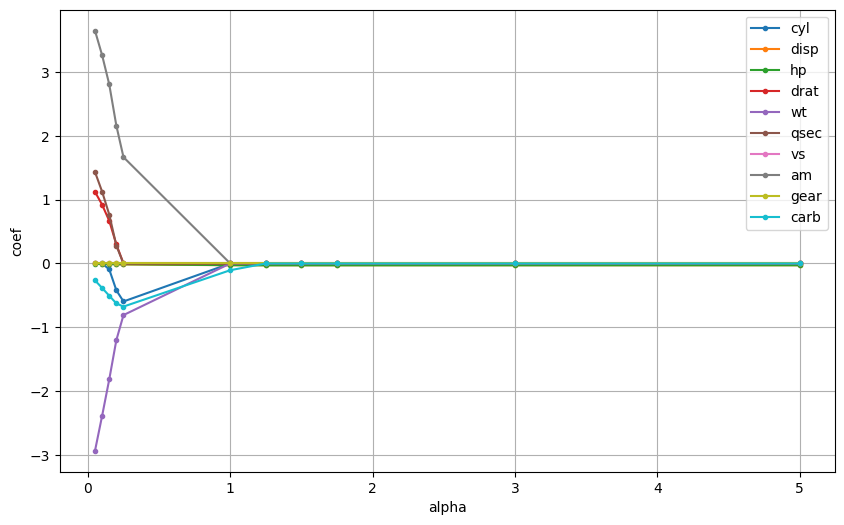

In [134]:
# Buat summary plot
models = pd.concat(model_list, axis=1)
models.columns = alphas

# Plot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

for col in X_train.columns:
    ax.plot(alphas, models.loc[col], label=col, marker=".")

ax.set_xlabel("alpha")
ax.set_ylabel("coef")
plt.legend()
plt.grid()
plt.show()

Ada cara lebih cepat

In [135]:
# Import grid search
from sklearn.model_selection import GridSearchCV

In [136]:
# Buat model & parameter model yang ingin divariasikan
lasso = Lasso()

param_space = {"alpha": alphas}
param_space

{'alpha': [0.05, 0.1, 0.15, 0.2, 0.25, 1.0, 1.25, 1.5, 1.75, 3.0, 5.0]}

In [137]:
# Lakukan grid search dengan CV
cv_lasso = GridSearchCV(estimator = lasso,
                        param_grid = param_space,
                        scoring = "neg_mean_squared_error",
                        cv = 5)

# Fit searching
cv_lasso.fit(X = X_train,
             y = y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.05, 0.1, 0.15, 0.2, 0.25, 1.0, 1.25, 1.5,
                                   1.75, 3.0, 5.0]},
             scoring='neg_mean_squared_error')

In [138]:
cv_lasso.best_params_

{'alpha': 0.15}

In [139]:
# Buat objek baru
best_lasso = Lasso(alpha = cv_lasso.best_params_["alpha"])

# Fit model
best_lasso.fit(X = X_train,
               y = y_train)

Lasso(alpha=0.15)

In [140]:
best_lasso.coef_

array([-0.09288145, -0.00641718, -0.01009455,  0.66899118, -1.81946701,
        0.76774888,  0.        ,  2.80886172,  0.        , -0.50616465])

---
# **Comparison**

**Comparing the model parameters**

In [141]:
best_params = pd.concat([lr_params_df,
                         lr_params_best,
                         best_param_ridge,
                         best_param_lasso],
                        axis = 1)
best_params.columns = ["OLS full features", "OLS best features", "Ridge", "Lasso"]
best_params

,OLS full features,OLS best features,Ridge,Lasso
am,5.880618,4.763395,1.701397,2.808862
qsec,2.139810,2.539308,0.624478,0.767749
drat,1.820345,1.639653,1.025724,0.668991
cyl,1.097167,1.282553,-0.453721,-0.092881
vs,0.851392,NaN,-0.126656,0.000000
carb,0.032545,NaN,-0.731590,-0.506165
disp,0.006168,NaN,-0.005147,-0.006417
hp,-0.005287,NaN,-0.007531,-0.010095
gear,-1.092819,NaN,0.680265,0.000000
wt,-3.668249,-3.579665,-1.539528,-1.819467


- Apa yang dapat Anda simpulkan?

- Terlihat Best Ridge tidak menghilangkan feature, namun best Lasso iya (fitur `vs` dan `gear` hilang)

**Memilih model terbaik**

- Bandingkan dari performa di data validation

In [143]:
best_scores_df = pd.DataFrame({"Model": ["Baseline", "OLS full features", "OLS best features", "Ridge", "Lasso"],
                               "CV Scores": [mse_baseline_cv, mse_lr_cv, cv_best_score, best_ridge_cv, best_lasso_cv]})

best_scores_df

,Model,CV Scores
0,Baseline,39.234350
1,OLS full features,23.421110
2,OLS best features,7.989577
3,Ridge,10.789408
4,Lasso,12.976375


- Best model adalah **OLS - best features**

- Cari performa best model di data Test

In [144]:
# Cari score
def mse_model(estimator, X_test, y_test):
    # Predict
    y_pred = estimator.predict(X_test)

    # Cari mse
    mse = mean_squared_error(y_test, y_pred)

    return mse

In [145]:
lr_params_best

,coefficient
cyl,1.282553
drat,1.639653
wt,-3.579665
qsec,2.539308
am,4.763395
constant,-29.508518


In [146]:
mse_model(estimator = lr_best,
          X_test = X_test[lr_params_best.index[:-1]],
          y_test = y_test)

np.float64(17.67591322557076)